# **Intoduction**
---

## **Project description:**

Market basket analysis is a data mining technique used by retailers to increase sales by better understanding of customer purchasing patterns.

Market basket analysis uses transaction data (in this project `"Groceries_dataset.csv"`) i.e. the list of all items bought by a customer in a single purchase to determine what products are ordered or purchased together and identify patterns of co-occurrence.

The insights gained from market basket analysis are valuable for various applications, such as:
*   **Cross-Selling**: Recommending related products to customers based on their purchasing patterns.
*   **Inventory Management**: Optimizing stock placement by grouping items that are frequently bought together.
*   **Promotion Planning**: Designing effective promotions or discounts for products that exhibit strong associations.
*   **Layout Optimization**: Arranging store layouts to encourage the purchase of associated items.

## **Goal of the project**

Analyze transactional data from a retail store to identify patterns of items frequently purchased together. In other words, answer the question - "*Which items are frequently bought together?*"

Also this project showcases author's ability to derive actionable insights from large datasets.

## Definitions

In this project we implement both Apriori algorithm and association rules to achive goal.

**Apriori algorithm** is an algorithm that is used to identify frequent item sets in a dataset. It works by first identifying all of the single items that are present in the dataset, and then progressively building up to larger and larger item sets, only considering those that meet a minimum support threshold.

---
**Association rules** are the outcome of market basket analysis. They are expressions that highlight the relationships and associations between items in a dataset of transactions. These rules are usually in the form of "if-then" statements, specifying the conditions under which certain items are likely to be bought together.

`If {A} Then {B}`

## Measurment metrics



1. **Support**. Measures the frequency or occurrence of a specific itemset in a dataset. It provides information about how often a particular combination of items appears together in transactions.

2. **Confidence**. Measures the likelihood that the presence of one item (antecedent) in a transaction will also be accompanied by the presence of another item (consequent).

3. **Lift**. Measures the strength of a rule by comparing the observed support of the rule with the expected support under the assumption of independence between the antecedent and consequent

4. **Leverage**. Measures the difference between the observed frequency of co-occurrence of items in a dataset and the expected frequency if the items were independent.

5. **Conviction**. Quantifies the degree of implication between the antecedent and consequent of a rule.



# Analysis

## Data preprocessing

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# starting by importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules, fpmax, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# reading .csv file
df_all = pd.read_csv('Groceries_dataset.csv')
df_all.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
# change type of column Date
df_all['Date_prop'] = pd.to_datetime(df_all['Date'])

<ipython-input-38-06a86e917d49>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_all['Date_prop'] = pd.to_datetime(df_all['Date'])


In [ ]:
# showing number of transactions
df_all.shape

(38765, 4)

* `Member_number` - ID of customer

* `Date` - Date of purchase

* `itemDescription`- Description of product purchased

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   Date_prop        38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


## Transaction-level analysis

In the used dataset we have total number of **3898** transactions for **167** unique items.

In [ ]:
df_all.nunique()

Member_number      3898
Date                728
itemDescription     167
Date_prop           728
dtype: int64

In [ ]:
# there isn't null values
df_all.isnull().sum()

Member_number      0
Date               0
itemDescription    0
Date_prop          0
dtype: int64

When performing market basket analysis, duplicates in the dataset might affect the results, as they can artificially inflate the support for certain item combinations.

In this case duplicates formed because some items were bought more than once in a single purchasing. We deleted them.

In [ ]:
df_all.duplicated().sum()

759

In [ ]:
df_all[df_all.duplicated(keep=False)].sort_values(by='Member_number').head()

,Member_number,Date,itemDescription,Date_prop
33098,1003,27-02-2014,rolls/buns,2014-02-27
37649,1003,27-02-2014,rolls/buns,2014-02-27
31248,1005,09-01-2014,rolls/buns,2014-09-01
15099,1005,09-01-2014,rolls/buns,2014-09-01
7532,1006,14-06-2015,frankfurter,2015-06-14


In [ ]:
# df = df_all.drop_duplicates()

In [ ]:
df = df_all

## Item frequency analysis

In [ ]:
value_counts= df['itemDescription'].value_counts().head(20)
df['itemDescription'].value_counts().head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

We can see that the most popular item in used dataset is **whole milk**. Then **other vegetables** and third by frequency are **rolls/buns**.

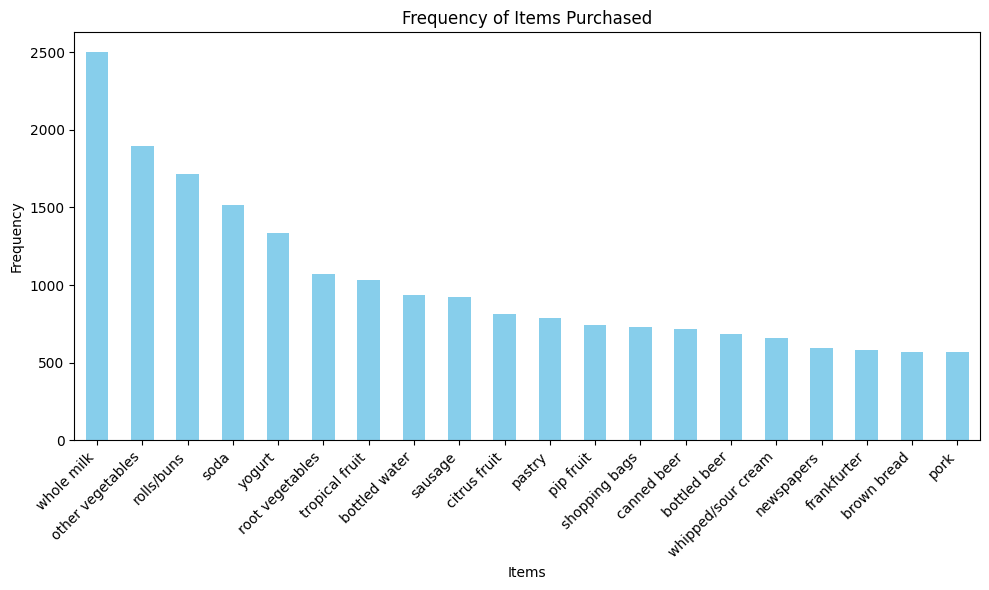

In [ ]:
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Frequency of Items Purchased')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Association rule mining

To conduct analysis we need to transform used dataset to be in a binary format with rows representing transactions and columns representing items.

In [ ]:
# group by one purchase, then aggregate items into a list
grouped = df.groupby(['Member_number', 'Date'])['itemDescription'].agg(list)

# convert the grouped Series into a DataFrame and reset index
result_df = grouped.reset_index()

# create list of items
items = list(result_df['itemDescription'])

The TransactionEncoder is a crucial component when working with association rule mining, particularly when using libraries like mlxtend in Python. It plays a key role in transforming the dataset into a format suitable for mining frequent itemsets and generating association rules.

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(items).transform(items)
df_items = pd.DataFrame(te_ary, columns=te.columns_)
df_items.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In the context of market basket analysis, the approach to handling duplicate values differs from typical machine learning scenarios. Unlike conventional machine learning tasks where preprocessing often involves removing duplicates to enhance model performance, market basket analysis views these duplicate values differently.

Approximately 47% of the data is comprised of duplicate values, and in the realm of market basket analysis, this redundancy is not necessarily undesirable. In fact, these duplicates can be insightful as they signify instances where the same items are repetitively purchased, potentially in a similar order or sequence. This repetition in the dataset may capture recurring patterns and relationships between items, which is precisely the kind of information sought after in market basket analysis.

In [ ]:
n_rows, n_items = df_items.shape
n_duplicates = df_items.duplicated().sum()

print(f"Duplicate values: {n_duplicates}")
print(f"% of duplicates: {round((n_duplicates/n_rows)*100, 2)}%")

Duplicate values: 6971
% of duplicates: 46.59%


In [ ]:
# minimum support threshold

minimum_support_threshold = 0.003

In [ ]:
freq_itemsets = apriori(df_items, minimum_support_threshold, use_colnames=True)

In [ ]:
freq_itemsets

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.008087,(baking powder)
3,0.033950,(beef)
4,0.021787,(berries)
...,...,...
211,0.008220,"(tropical fruit, whole milk)"
212,0.005213,"(tropical fruit, yogurt)"
213,0.004611,"(whipped/sour cream, whole milk)"
214,0.003141,"(white bread, whole milk)"


Our main focus is on item sets of length two or greater.

In [ ]:
lengths = [len(itemset) for itemset in freq_itemsets.itemsets]
freq_itemsets[[val>1 for val in lengths]]

,support,itemsets
111,0.004678,"(beef, whole milk)"
112,0.004678,"(other vegetables, bottled beer)"
113,0.004010,"(rolls/buns, bottled beer)"
114,0.003342,"(sausage, bottled beer)"
115,0.007151,"(whole milk, bottled beer)"
...,...,...
211,0.008220,"(tropical fruit, whole milk)"
212,0.005213,"(tropical fruit, yogurt)"
213,0.004611,"(whipped/sour cream, whole milk)"
214,0.003141,"(white bread, whole milk)"


Let's have a deeper look at the frequent itemsets based on their length.

In [ ]:
freq_itemsets.groupby(lengths)['support'].describe()

,count,mean,std,min,25%,50%,75%,max
1,111.0,0.022182,0.026045,0.003007,0.005814,0.013968,0.027936,0.157923
2,105.0,0.005016,0.002237,0.003007,0.003542,0.004411,0.005614,0.014837


Observing the results, we can see that in used data we have only pairs of items that are important to our goal. However, it's noteworthy that the mean value for support is considerably higher for item sets of length 1 compared to those of length 2.

This observation highlights that single-item sets tend to have a higher frequency or support within the dataset. The difference in average support values across different lengths of item sets emphasizes the varying levels of prevalence among these sets, offering insight into their respective importance in market basket analysis.

Now that we have the item sets it's time to generate **Association Rules** and evaluate them. In order to do so we need to define 2 things,

* **Metric**: We have already seen all the metrics used to identify the Association Rules, here we select the one out all, that will server as the main metric to generate the association rules.

* **Threshold**: After selecting the metric we need to set an appropriate threshold value with respect to the metric.

In [ ]:
rules = association_rules(freq_itemsets, metric='confidence', min_threshold=0.1)

In [ ]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(whole milk),0.033950,0.157923,0.004678,0.137795,0.872548,-0.000683,0.976656,-0.131343
1,(bottled beer),(other vegetables),0.045312,0.122101,0.004678,0.103245,0.845568,-0.000854,0.978973,-0.160585
2,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
3,(bottled water),(whole milk),0.060683,0.157923,0.007151,0.117841,0.746196,-0.002432,0.954564,-0.265842
4,(brown bread),(whole milk),0.037626,0.157923,0.004478,0.119005,0.753566,-0.001464,0.955825,-0.253625


In [ ]:
print(f'Total number of association rules: {rules.shape[0]}')

Total number of association rules: 39


In [ ]:
rules[rules['antecedents'] == {'rolls/buns'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.96455,-0.214986


We have only one Association Rules with 'rolls/buns' as the Antecedent.

In [ ]:
rules[rules['consequents'] == {'rolls/buns'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(fruit/vegetable juice),(rolls/buns),0.034017,0.110005,0.003743,0.110020,1.000136,5.091755e-07,1.000017,0.000141
27,(pip fruit),(rolls/buns),0.049054,0.110005,0.004946,0.100817,0.916483,-4.506739e-04,0.989783,-0.087448


We have 2 Association Rule with 'rolls/buns' as the Consequents. Let's have a look at all the Antecedents with length greater than 1. We don't have this type of rules.

In [ ]:
rules[rules['antecedents'].str.len()>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


This way we can extract may association rules, but the most important thing is to make sure that the association rule makes sense.

## Rule evaluation



In [ ]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,0.047778,0.149036,0.005943,0.124967,0.842808,-0.001244,0.972557,-0.164261
std,0.022553,0.016618,0.002822,0.014273,0.084776,0.001082,0.015186,0.087784
min,0.021854,0.110005,0.003074,0.100817,0.668077,-0.004446,0.941399,-0.341907
25%,0.033984,0.157923,0.004110,0.115007,0.786266,-0.001429,0.961463,-0.221130
50%,0.038896,0.157923,0.004946,0.126556,0.844887,-0.000961,0.973040,-0.161610
75%,0.050391,0.157923,0.006884,0.135006,0.878968,-0.000582,0.980496,-0.124960
max,0.122101,0.157923,0.014837,0.157817,1.116150,0.000536,1.016420,0.108146


We know that **lift** is one of criteria used in association rule to detect the best association rules. The value of lift ranges between 0 to ∞ where 1 indicates complete independence between antecedent and consequent.

In [ ]:
rules.sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,5.355097e-04,1.016420,0.108146
17,(fruit/vegetable juice),(rolls/buns),0.034017,0.110005,0.003743,0.110020,1.000136,5.091755e-07,1.000017,0.000141
2,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-4.792503e-06,0.999874,-0.000702
32,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-5.750423e-04,0.988811,-0.063965
15,(frozen vegetables),(other vegetables),0.028002,0.122101,0.003141,0.112172,0.918679,-2.780456e-04,0.988816,-0.083468


The first row contains the antecedent **frankfurter** and the consequent **other vegetables**, with a lift score of 1.11. That means that customers who buy frankfurter are 1.11 more times likely to buy other vegetables.

Remember that lift values above 1 indicates high likelihood whereas lift values below 1 indicates low likelihood.

Due to the range of lift, it could be a little difficult to interpret it. So we can have a look at a normalized version of the lift known as leverage, the values of leverage range between -1 to +1.

In [ ]:
rules.sort_values('leverage', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,5.355097e-04,1.016420,0.108146
17,(fruit/vegetable juice),(rolls/buns),0.034017,0.110005,0.003743,0.110020,1.000136,5.091755e-07,1.000017,0.000141
2,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-4.792503e-06,0.999874,-0.000702
15,(frozen vegetables),(other vegetables),0.028002,0.122101,0.003141,0.112172,0.918679,-2.780456e-04,0.988816,-0.083468
19,(hamburger meat),(whole milk),0.021854,0.157923,0.003074,0.140673,0.890769,-3.769819e-04,0.979926,-0.111400


Based on leverage rule `if frankfurter, then other vegetable` is more unlikely (because the value is very small). But among other rules this rule is the most likely to happen.


Unlike the lift and leverage, which are independent on the direction. Conviction is direction dependent. That means the conviction of A to B is not equal to the convection of B to A, which gives us more authority over the assurance of the rule.

In [ ]:
rules.sort_values('conviction', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,5.355097e-04,1.016420,0.108146
17,(fruit/vegetable juice),(rolls/buns),0.034017,0.110005,0.003743,0.110020,1.000136,5.091755e-07,1.000017,0.000141
2,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-4.792503e-06,0.999874,-0.000702
27,(pip fruit),(rolls/buns),0.049054,0.110005,0.004946,0.100817,0.916483,-4.506739e-04,0.989783,-0.087448
15,(frozen vegetables),(other vegetables),0.028002,0.122101,0.003141,0.112172,0.918679,-2.780456e-04,0.988816,-0.083468


Conviction shows us the rule about frankfurter and other vegetables again. Moreover, it shows that for antecedents, the consequent is 1,02 times dependent on the antecedent, for other vegetables the antecedent is frankfurter.

In [ ]:
rules.sort_values('zhangs_metric', ascending=True).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
36,(whipped/sour cream),(whole milk),0.043708,0.157923,0.004611,0.105505,0.668077,-0.002291,0.941399,-0.341907
31,(root vegetables),(whole milk),0.069572,0.157923,0.007552,0.108549,0.687357,-0.003435,0.944615,-0.328344
3,(bottled water),(whole milk),0.060683,0.157923,0.007151,0.117841,0.746196,-0.002432,0.954564,-0.265842
34,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917
25,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477


In [ ]:
rules.sort_values('zhangs_metric', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,5.355097e-04,1.016420,0.108146
17,(fruit/vegetable juice),(rolls/buns),0.034017,0.110005,0.003743,0.110020,1.000136,5.091755e-07,1.000017,0.000141
2,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-4.792503e-06,0.999874,-0.000702
32,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-5.750423e-04,0.988811,-0.063965
15,(frozen vegetables),(other vegetables),0.028002,0.122101,0.003141,0.112172,0.918679,-2.780456e-04,0.988816,-0.083468


We know that -1 value for this metric represents perfect dissociation and +1 value represents perfect association.

Looking at the minimum value, we found out then the negative case was for the antecedent whipped/sour cream to the consequent whole milk, which is quite interesting.

In the positive case, we can see that for the interested in franfurter, we have the consequent other vegetable, which is again something like meat related to vegetable doesn't make sense at the first place, although the the metric score is only 0.1 which represents a weak association.

# Final interpretation and insights


In this project we conducted analysis of transactional data from a retail store to identify patterns of items frequently purchased together.

"*Which items are frequently bought together?*". It can be concluded that the project did not provide a definitive answer to this question. Although we found a rule

```
if frankfurter, then other vegetables
```

, most of the evaluation metrics for this rule were low, but still with the highest score compared to the other rules.

As a result, the author wishes to repeat this analysis with a different dataset.